In [260]:
import numpy as np
from scapy.utils import rdpcap, PcapReader
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
def calculate_packets_per_second1(packets, interval=1.0):
    # for pkt in packets[0:50]:
    #     print(pkt.time)
    timestamps = np.array([int(pkt.time) for pkt in packets])  # Временные метки пакетов
    packet_counts = []  # Список для хранения количества пакетов за каждую секунду

    start_time = timestamps[0]
    end_time = timestamps[-1]
    print(start_time, end_time)

    # Разделим временной промежуток на интервалы
    time_bins = np.arange(start_time, end_time, interval)

    for start, end in zip(time_bins[:-1], time_bins[1:]):
        # Считаем количество пакетов в каждом интервале
        count = np.sum((timestamps >= start) & (timestamps < end))
        packet_counts.append(count)

    return packet_counts

In [262]:
def calculate_packets_per_second2(pcap_file, interval=1.0):
    # Первый проход: определение start_time и end_time
    with PcapReader(pcap_file) as pcap:
        first_packet = next(pcap, None)
        if not first_packet:
            return []
        start_time = first_packet.time
        end_time = first_packet.time
        last_packet = first_packet
        for packet in pcap:
            last_packet = packet
            end_time = last_packet.time

    # Создание временных интервалов (time_bins)
    time_bins = np.arange(start_time, end_time, interval)
    if len(time_bins) == 0:
        return []
    num_intervals = len(time_bins) - 1
    packet_counts = [0] * num_intervals

    # Второй проход: подсчёт пакетов в интервалах
    with PcapReader(pcap_file) as pcap:
        for packet in pcap:
            t = packet.time
            if t < start_time or t >= end_time:
                continue
            # Определение индекса интервала
            index = np.searchsorted(time_bins, t, side='right') - 1
            if 0 <= index < num_intervals:
                packet_counts[index] += 1

    return packet_counts

In [263]:
def plot_packet_distribution1(packets, interval=1.0):
    # Получаем количество пакетов за каждый интервал
    packet_counts = calculate_packets_per_second1(packets, interval)

    # Строим гистограмму распределения количества пакетов за секунду
    # plt.figure(figsize=(10, 6))
    # plt.hist(packet_counts, bins=50, density=False, alpha=0.6, color="green")
    # plt.title(f"Packet Count Distribution (Interval = {interval} sec)")
    # plt.xlabel("Number of Packets per Second")
    # plt.ylabel("Density")
    # plt.show()
    plt.figure(figsize=(8, 6))
    sns.histplot(packet_counts, bins=50, kde=True, color="skyblue", edgecolor="black")
    # lower, upper = 500, 1500
    # plt.xlim(lower, upper)
    plt.title(
            f"{'Normal'} (mean ≈ {np.mean(packet_counts):.2f})"
            )
    plt.xlabel("Пакетов/сек")
    plt.ylabel("Число таких секунд")
    plt.tight_layout()
    # Сохраняем график перед отображением
    plt.savefig(
            "",
            dpi=300,  # Высокое разрешение
            bbox_inches='tight',  # Обрезка пустых полей
            facecolor='white',  # Фон
            format='png',
            )
    # plt.show()
    plt.close()

In [264]:
def plot_packet_distribution2(packet_counts):
    # Получаем количество пакетов за каждый интервал

    # Строим гистограмму распределения количества пакетов за секунду
    # plt.figure(figsize=(10, 6))
    # plt.hist(packet_counts, bins=50, density=False, alpha=0.6, color="green")
    # plt.title(f"Packet Count Distribution (Interval = {interval} sec)")
    # plt.xlabel("Number of Packets per Second")
    # plt.ylabel("Density")
    # plt.show()
    plt.figure(figsize=(8, 6))
    sns.histplot(packet_counts, bins=60, kde=True, color="skyblue", edgecolor="black")
    # Ограничиваем ось X
    # lower = np.percentile(packet_counts, 5)   # 5-й перцентиль
    # upper = np.percentile(packet_counts, 95)  # 95-й перцентиль
    lower, upper = 500, 1500
    plt.xlim(lower, upper)
    plt.title(
            f"{'Normal'} (mean ≈ {np.mean(packet_counts):.2f})"
            )
    plt.xlabel("Пакетов/сек")
    plt.ylabel("Число таких секунд")
    plt.tight_layout()
    # Сохраняем график перед отображением
    plt.savefig(
            "",
            dpi=300,  # Высокое разрешение
            bbox_inches='tight',  # Обрезка пустых полей
            facecolor='white',  # Фон
            format='png',
            )
    # plt.show()
    plt.close()

In [265]:
pcap_path = "../../pcaps/normal/normal-median-500-dur-15-min-tcp-0.9-udp-0.1-ses-60-sec-seed-60-sender7.pcap"

In [266]:
packet_counts = calculate_packets_per_second2(pcap_path)

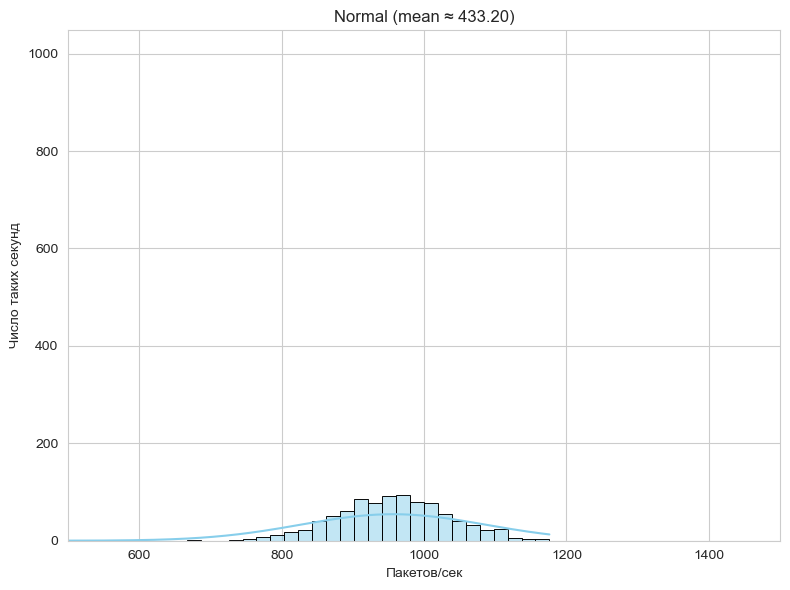

In [267]:
plot_packet_distribution2(packet_counts)

In [268]:
packets = rdpcap(pcap_path)

1740766510 1740768520


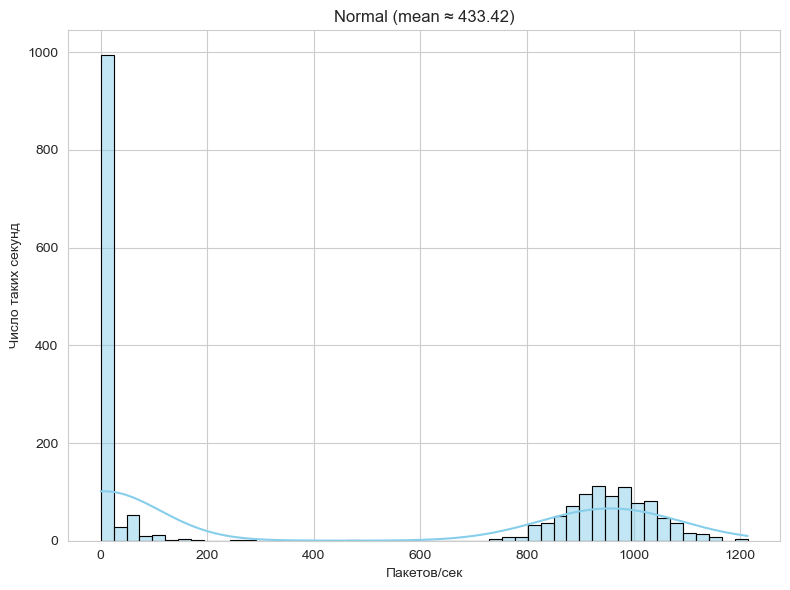

In [269]:
plot_packet_distribution1(packets)

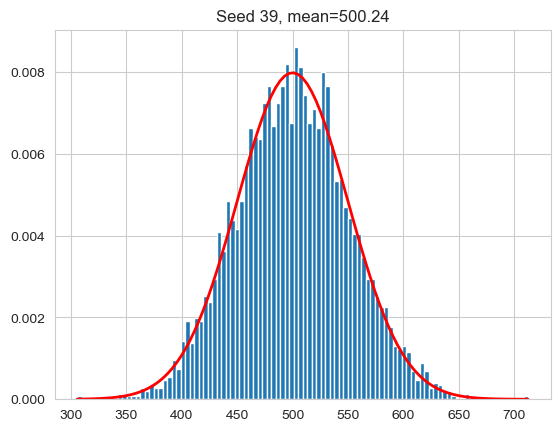

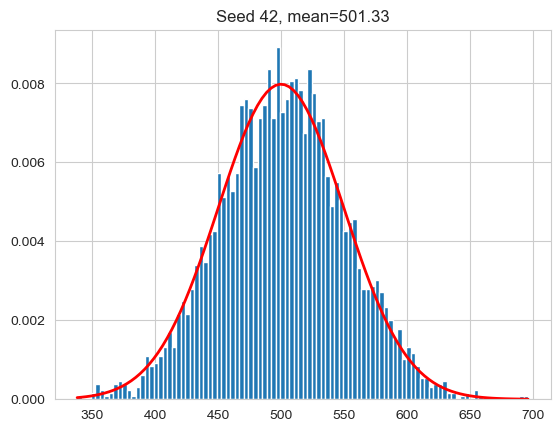

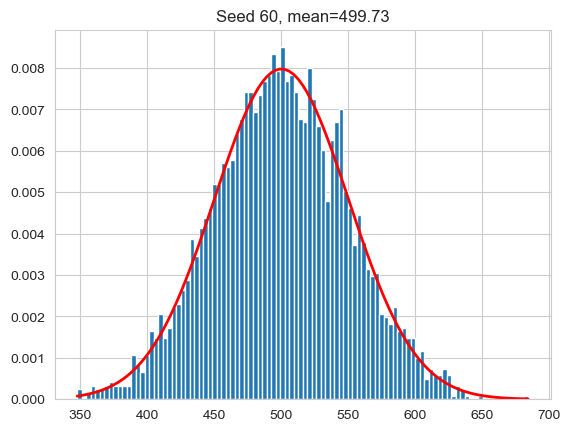

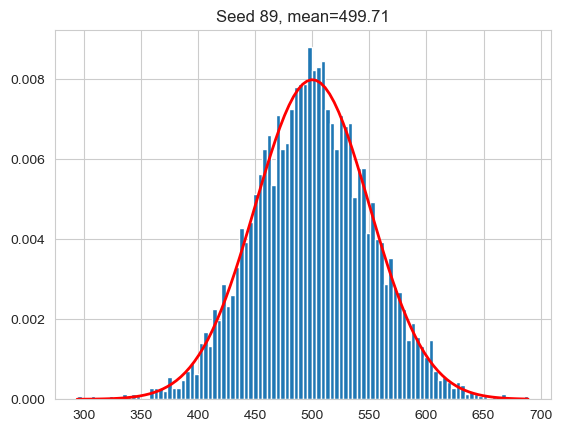

In [272]:
mu = 500  # mean and standard deviation
sigma = mu * 0.1
for seed in [39, 42, 60, 89]:
    np.random.seed(seed)
    s = np.random.normal(mu, sigma, 60 * 60 * 1)
    s = np.clip(s, 0, None)
    # abs(mu - np.mean(s))
    # abs(sigma - np.std(s, ddof=1))
    mean = np.mean(s)
    count, bins, ignored = plt.hist(s, 100, density=True)
    plt.plot(bins, 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (bins - mu) ** 2 / (2 * sigma ** 2)), linewidth=2,
             color='r'
             )
    plt.title(f"Seed {seed}, mean={mean:.2f}")
    plt.show()